# <b> <u> Chapter 3
# Assignment: Training Models </u> </b>

# 1.  Preparation of data

### 1.1 Import libraries and Load the pre-trained model ResNet50

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Flatten, Dropout
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
base=ResNet50(weights='imagenet')

### 1.2 Make Image data generators

In [3]:
TARGET_SIZE = (224, 224)
BATCH_SIZE = 5
CLASSES = ['5', '10', '20', '50', '100', '200', '500']
RANDOM_SEED = 0
train_data_dir = 'resources/data/train_data_keras'
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, classes=CLASSES, seed=RANDOM_SEED,shuffle=True)
valid_data_dir = 'resources/data/validation_data_keras'
val_generator = ImageDataGenerator().flow_from_directory(valid_data_dir, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, classes=CLASSES, seed=RANDOM_SEED,shuffle=True)

Found 70 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


### 1.3 Set parameters in pre-trained model to False 

In [4]:
for layer in base.layers:
    layer.trainable=False

### 1.4 Repalce the old last classification layer with a new classification layer

In [5]:
last_base=base.layers[-2].output
connected_model=Dense(len(CLASSES),activation='softmax')(last_base)
base_input=base.input
model=Model(inputs=base_input,outputs=connected_model)

### 1.5 Print Model summary

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,602,055 (90.03 MB)

 Trainable params: 14,343 (56.03 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

# 2.  Train the model

#### 2.1  Compile the model using <b> Adam </b> optimizer, Loss function as <b> categorical_crossentropy </b> and <b> Accuracy </b> metrics as parameters.

In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

#### 2.2 Train the model with 20 epochs

In [8]:
epochs=20
steps=train_generator.n//train_generator.batch_size
model.fit(train_generator,validation_data=val_generator,steps_per_epoch=steps,epochs=epochs)

Epoch 1/20


/Users/govindswarooprahangdale/tfenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 449ms/step - accuracy: 0.2127 - loss: 2.3816 - val_accuracy: 0.5857 - val_loss: 1.1821
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.9345 - loss: 0.7278 - val_accuracy: 0.8857 - val_loss: 0.5395
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 1.0000 - loss: 0.2794 - val_accuracy: 0.9571 - val_loss: 0.3257
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step - accuracy: 1.0000 - loss: 0.1276 - val_accuracy: 0.9857 - val_loss: 0.2061
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 338ms/step - accuracy: 1.0000 - loss: 0.0799 - val_accuracy: 0.9857 - val_loss: 0.1639
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 356ms/step - accuracy: 1.0000 - loss: 0.0521 - val_accuracy: 1.0000 - val_loss: 0.1350
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step - accuracy: 1.0000 - loss: 0.0519 - val_accuracy: 1.0000 - val_loss: 0.1238
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 1.0000 - loss: 0.0378 - val_accuracy: 1.0000 - val

#### 2.3 Plot out the result of loss for both Training and Validation

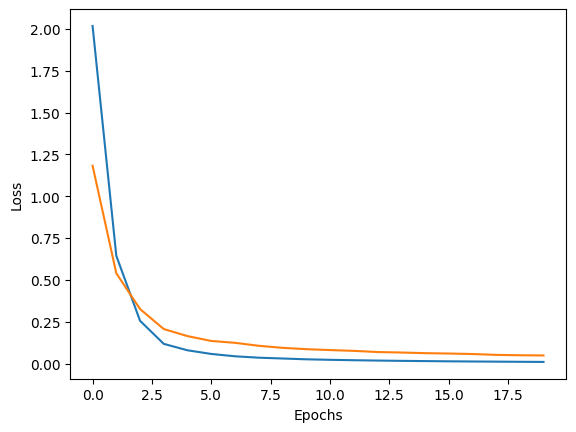

In [9]:
# Get the Training history
train_history = model.history.history
plt.plot(train_history['loss'],label='Training Loss')
plt.plot(train_history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### 2.4 Plot out the result of Accuracy for both Training and Validation

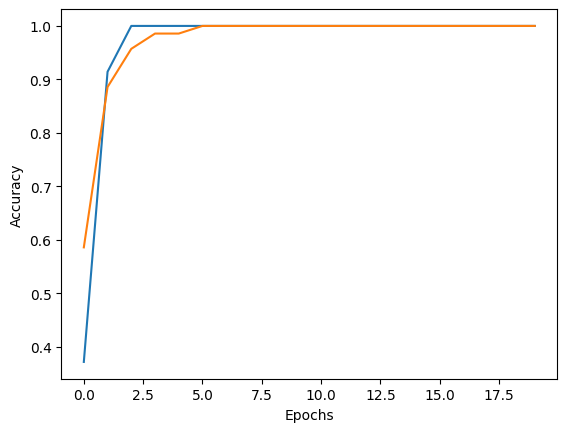

In [10]:
# Get the Training history
plt.plot(train_history['accuracy'],label='Training Accuracy')
plt.plot(train_history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# 3. Plot the Predictions for 5 random images

### 3.1 Use the validation dataset as your test to see whether the model can predict

In [11]:
test_valid_generator = ImageDataGenerator().flow_from_directory(valid_data_dir, target_size=(224, 224), batch_size=5, classes=CLASSES, seed=0, shuffle=False)

Found 70 images belonging to 7 classes.


### 3.2 Plot 5 random images with their predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


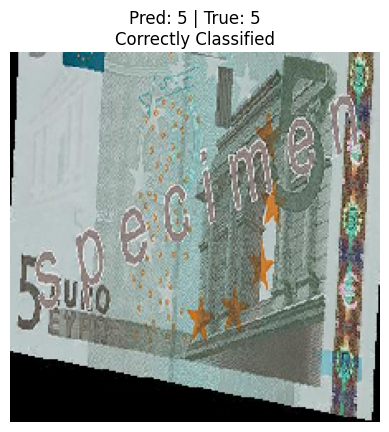

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


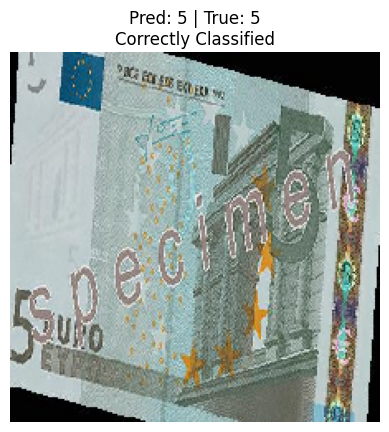

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


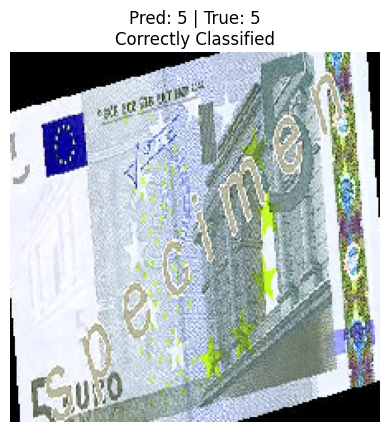

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


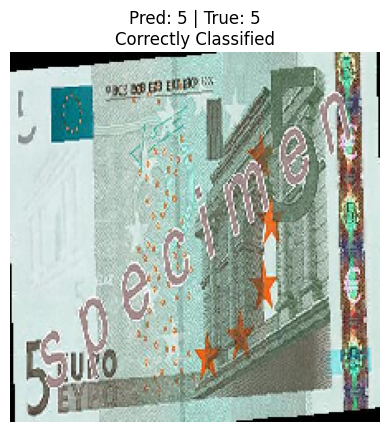

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


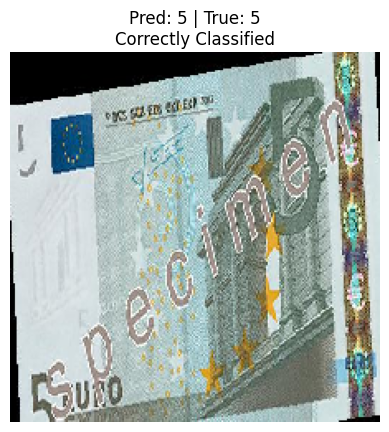

In [12]:
val_images, val_labels = next(test_valid_generator)
class_names = list(CLASSES)

for i in range(5):
    image = val_images[i]
    true_label = np.argmax(val_labels[i])
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction)

    # Plot the image
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')

    # Title with prediction info
    pred_class = class_names[predicted_label]
    true_class = class_names[true_label]
    result = "Correctly Classified" if predicted_label == true_label else "Misclassified"
    plt.title(f"Pred: {pred_class} | True: {true_class}\n{result}")
    plt.show()

# 4. Use Model <b> VGG16 </b> for the prediction

### 4.1 Repeat all steps for VGG16 model

#### Note: Add custom layers for classification layers for the VGG16 model

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,271 (80.64 MB)

 Trainable params: 6,424,583 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4113 - loss: 51.4392 - val_accuracy: 0.9000 - val_loss: 5.7309
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8540 - loss: 15.1284 - val_accuracy: 1.0000 - val_loss: 1.7370e-07
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9903 - loss: 0.9945 - val_accuracy: 0.9571 - val_loss: 1.9627
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9409 - loss: 7.5360 - val_accuracy: 0.9857 - val_loss: 0.7102
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9687 - loss: 3.1451 - val_accuracy: 0.9143 - val_loss: 5.2266
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9696 - loss: 2.5717 - val_accuracy: 0.9714 - val_loss: 1.1104
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9555 - loss: 3.5894 - val_accuracy:

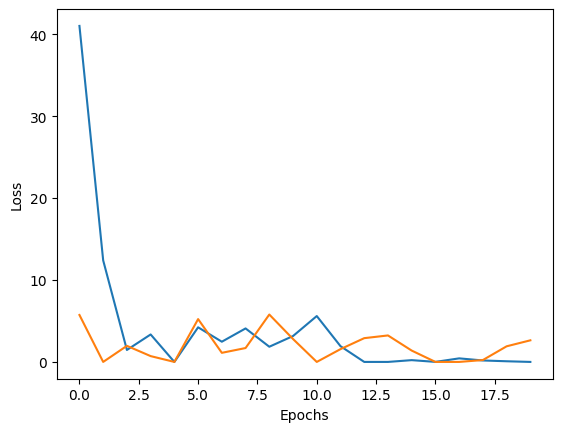

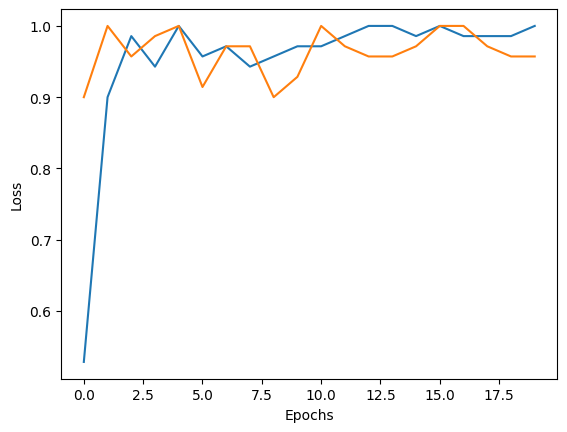

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


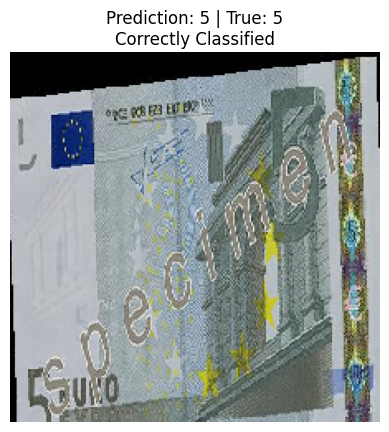

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


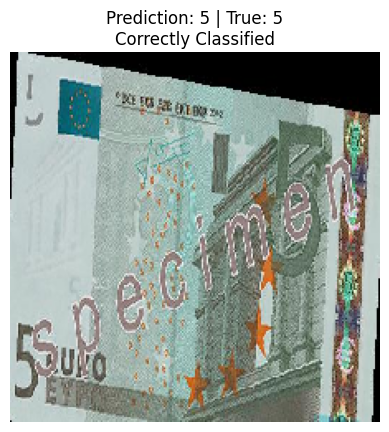

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


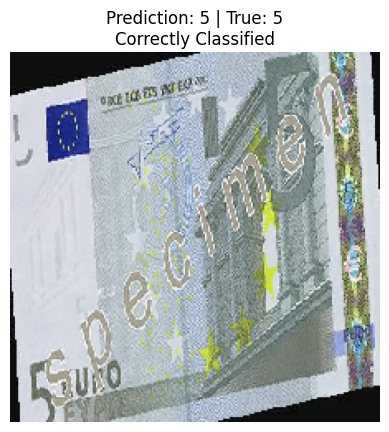

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


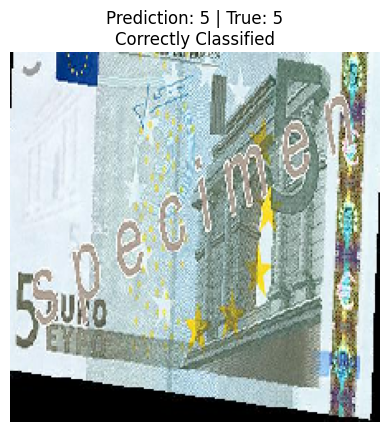

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


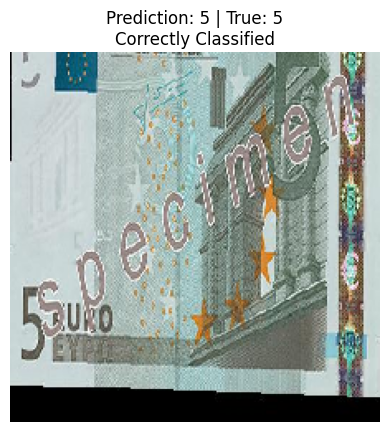

In [13]:
# Import VGG16 model
from keras.applications.vgg16 import VGG16
basev=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
# Set parameters as non-trainable 
basev.trainable=False
# Set custom layers
basev_input=basev.input
x = basev.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
connected_modelv = Dense(len(CLASSES), activation='softmax')(x)
modelv=Model(inputs=basev_input,outputs=connected_modelv)
# Print model summary
print(modelv.summary())
# Compile the model
modelv.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Fit the model
epochs=20
steps=train_generator.n // train_generator.batch_size
modelv.fit(train_generator,validation_data=val_generator,steps_per_epoch=steps,epochs=epochs)
# Plot Loss and Accuracy for Training and Validation
train_historyv=modelv.history.history
plt.plot(train_historyv['loss'],label='Training Loss')
plt.plot(train_historyv['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(train_historyv['accuracy'],label='Training Accuracy')
plt.plot(train_historyv['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
# Test prediction with 5 random images from the validation dataset
val_images,val_labels=next(test_valid_generator)
for i in range(5):
    image=val_images[i]
    true_label=np.argmax(val_labels[i])
    prediction=modelv.predict(np.expand_dims(image,axis=0))
    predicted_label=np.argmax(prediction)

    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    pred_class=class_names[predicted_label]
    true_class=class_names[true_label]
    result='Correctly Classified' if predicted_label==true_label else 'MisClassified'
    plt.title(f'Prediction: {pred_class} | True: {true_class}\n{result}')
    plt.show()

In [14]:
model.save("resnetmodel.keras")
modelv.save("vggmodel.keras")